Entrega : 01

Grupo : 07

# Load

In [175]:
import os
from pathlib import Path 
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt
import seaborn as sns
# pre processing categorical
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [176]:
# from google.colab import drive
# drive.mount('/content/drive')

# Ruta Maria
#path_proyecto ='/content/drive/MyDrive/Machine Learning_Entregables/Entregable 1/data_inter'

# # Ruta Eliane
# path_proyecto ='/content/drive/MyDrive/2026/2026-0/Machine learning/data_inter' 

# os.chdir(path_proyecto)
# os.getcwd()

In [177]:
# Obtener directorio base 
BASE_DIR = Path(__file__).parent.parent if '__file__' in dir() else Path.cwd().parent

# Si estamos en scripts, subir un nivel; si no, usar cwd
if "scripts" in str(Path.cwd()):
    BASE_DIR = Path.cwd().parent
else:
    BASE_DIR = Path.cwd()

print(f"BASE_DIR: {BASE_DIR}")

# Rutas para datos
DATA_DIR = BASE_DIR / "data"
RAW_DATA_PATH = DATA_DIR / "raw"
INTER_DATA_PATH = DATA_DIR / "inter"
FINAL_DATA_PATH = DATA_DIR / "final"
# Rutas para gráficos, scripts y documentación
GRAPHS_DIR = BASE_DIR / "graphs"
GRAPHS_PATH_INCOME = GRAPHS_DIR / "data_income"
GRAPHS_PATH_LENDING = GRAPHS_DIR / "data_lending"
SCRIPTS_PATH = BASE_DIR / "scripts"
DOCS_PATH = BASE_DIR / "docs"

print(f"RAW_DATA_PATH: {RAW_DATA_PATH}")
print(f"Existe: {RAW_DATA_PATH.exists()}")

BASE_DIR: c:\Users\leydi\Documents\Machine-Learning-para-Finanzas_2026_0\Grupo07
RAW_DATA_PATH: c:\Users\leydi\Documents\Machine-Learning-para-Finanzas_2026_0\Grupo07\data\raw
Existe: True


In [178]:
# cargando datos
df_raw = pd.read_excel(RAW_DATA_PATH / "income_dataset.xlsx")

In [179]:
df_raw.columns

Index(['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents',
       'Location', 'Work_Experience', 'Marital_Status', 'Employment_Status',
       'Household_Size', 'Homeownership_Status', 'Type_of_Housing', 'Gender',
       'Primary_Mode_of_Transportation', 'Income'],
      dtype='object')

In [180]:
print(df_raw.shape)

(10000, 14)


# EDA

## 1. Análisis estadístico inicial

In [181]:
TARGET_REG = "Income"  # variable objetivo para regresión

# selecciona las columnas numéricas y categóricas excepto la variable objetivo

num_raw= df_raw.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_raw = df_raw.select_dtypes(include=['object', "category", "bool"]).columns.tolist()
num_raw.remove(TARGET_REG)


print("=== Variables Identificadas ===")
print("Target de regresión:", TARGET_REG)
print("Variables numéricas para regresión:", num_raw)
print("Variables categóricas para regresión:", cat_raw)
print("--------------------------------")

=== Variables Identificadas ===
Target de regresión: Income
Variables numéricas para regresión: ['Age', 'Number_of_Dependents', 'Work_Experience', 'Household_Size']
Variables categóricas para regresión: ['Education_Level', 'Occupation', 'Location', 'Marital_Status', 'Employment_Status', 'Homeownership_Status', 'Type_of_Housing', 'Gender', 'Primary_Mode_of_Transportation']
--------------------------------


### 1.1) Numéricas - descriptivas

In [182]:
def eda_numericas_descriptivas(df, num_cols, top_n=5):
    """
    Realiza EDA descriptivo para variables numéricas.

    Args:
        df: DataFrame a analizar
        num_cols: Lista de columnas numéricas
        top_n: Número de valores más frecuentes a mostrar
    """

    num_cols = df.select_dtypes(include="number").columns.tolist()

    if TARGET_REG in num_cols:
        num_cols.remove(TARGET_REG)

    if "index" in num_cols:
        num_cols.remove("index")

    print("\n" + "=" * 50)
    print(" ESTATÍSTICAS DESCRIPTIVAS")
    print("=" * 50)
    display(df[num_cols].describe().T.round(2))

    print("\n" + "=" * 50)
    print("QUANTILES (1%, 25%, 50%, 75%, 99%)")
    print("=" * 50)
    display(df[num_cols].quantile([0.01, 0.25, 0.5, 0.75, 0.99]).T.round(2))

    print("\n" + "=" * 50)
    print(f"TOP {top_n} VALORES MÁS FRECUENTES POR VARIABLE")
    print("=" * 50)
    for col in num_cols:
        print(f"\n--- {col} ---")
        display(df[col].value_counts().head(top_n).round(2))

In [183]:
# regresión
eda_numericas_descriptivas(df_raw, num_raw, 5)


 ESTATÍSTICAS DESCRIPTIVAS


,count,mean,std,min,25%,50%,75%,max
Age,10000.0,44.02,15.20,18.0,31.0,44.0,57.0,70.0
Number_of_Dependents,10000.0,2.53,1.71,0.0,1.0,3.0,4.0,5.0
Work_Experience,10000.0,24.86,14.65,0.0,12.0,25.0,37.0,50.0
Household_Size,10000.0,3.99,2.01,1.0,2.0,4.0,6.0,7.0



QUANTILES (1%, 25%, 50%, 75%, 99%)


,0.01,0.25,0.50,0.75,0.99
Age,18.0,31.0,44.0,57.0,70.0
Number_of_Dependents,0.0,1.0,3.0,4.0,5.0
Work_Experience,0.0,12.0,25.0,37.0,50.0
Household_Size,1.0,2.0,4.0,6.0,7.0



TOP 5 VALORES MÁS FRECUENTES POR VARIABLE

--- Age ---


Age
43    223
66    216
62    215
40    212
64    209
Name: count, dtype: int64


--- Number_of_Dependents ---


Number_of_Dependents
5    1745
3    1712
1    1651
0    1642
4    1629
Name: count, dtype: int64


--- Work_Experience ---


Work_Experience
2     224
44    221
48    219
24    218
33    216
Name: count, dtype: int64


--- Household_Size ---


Household_Size
1    1477
3    1445
6    1437
7    1433
5    1411
Name: count, dtype: int64

### 1.2) Categóricas - frecuencias

In [184]:
def eda_categoricas_descriptivas(df, cat_cols, top_n=10):
    """
    Realiza EDA descriptivo para variables categóricas.

    Args:
        df: DataFrame a analizar
        cat_cols: Lista de columnas categóricas
        top_n: Número de categorías más frecuentes a mostrar
    """
    print("=" * 50)
    print("VALORES ÚNICOS POR VARIABLE")
    print("=" * 50)
    display(df[cat_cols].nunique().to_frame("n_unique"))

    print("\n" + "=" * 50)
    print(f"TOP {top_n} FRECUENCIAS POR VARIABLE")
    print("=" * 50)
    for col in cat_cols:
        print(f"\n--- {col} ---")
        display(df[col].value_counts(dropna=False).head(top_n))

In [185]:
# regresión
eda_categoricas_descriptivas(df_raw, cat_raw, 10)

VALORES ÚNICOS POR VARIABLE


,n_unique
Education_Level,4
Occupation,5
Location,3
Marital_Status,3
Employment_Status,3
Homeownership_Status,2
Type_of_Housing,3
Gender,2
Primary_Mode_of_Transportation,4



TOP 10 FRECUENCIAS POR VARIABLE

--- Education_Level ---


Education_Level
Bachelor's     4058
High School    2959
Master's       2482
Doctorate       501
Name: count, dtype: int64


--- Occupation ---


Occupation
Healthcare    3035
Technology    2407
Finance       1525
Others        1521
Education     1512
Name: count, dtype: int64


--- Location ---


Location
Urban       7037
Suburban    1951
Rural       1012
Name: count, dtype: int64


--- Marital_Status ---


Marital_Status
Married     5136
Single      3900
Divorced     964
Name: count, dtype: int64


--- Employment_Status ---


Employment_Status
Full-time        5004
Part-time        3016
Self-employed    1980
Name: count, dtype: int64


--- Homeownership_Status ---


Homeownership_Status
Own     6018
Rent    3982
Name: count, dtype: int64


--- Type_of_Housing ---


Type_of_Housing
Single-family home    4055
Apartment             4001
Townhouse             1944
Name: count, dtype: int64


--- Gender ---


Gender
Male      5123
Female    4877
Name: count, dtype: int64


--- Primary_Mode_of_Transportation ---


Primary_Mode_of_Transportation
Public transit    4047
Car               2986
Biking            1940
Walking           1027
Name: count, dtype: int64

## 2. Análisis de calidad (diagnóstico)

### 2.1) Numéricas

In [225]:
def eda_calidad_numericas(df, num_cols):

    print("\nVariables numéricas analizadas:")
    print(num_cols)

    # 1) Información general
    print("\n" + "=" * 50)
    print("INFORMACIÓN GENERAL (dtypes, nulos)")
    print("=" * 50)
    df[num_cols].info()

    # 2) Diagnóstico de dtypes incorrectos
    print("\n" + "=" * 50)
    print("DIAGNÓSTICO DE DTYPES INCORRECTOS")
    print("=" * 50)

    dtype_rows = []
    for col in num_cols:
        serie_original = df[col]
        serie_coerce = pd.to_numeric(serie_original, errors="coerce")

        dtype_rows.append({
            "variable": col,
            "dtype_original": serie_original.dtype,
            "NaN_antes": serie_original.isna().sum(),
            "NaN_despues_coerce": serie_coerce.isna().sum(),
            "valores_no_numericos": serie_coerce.isna().sum() - serie_original.isna().sum()
        })

    dtype_diag = pd.DataFrame(dtype_rows)
    display(dtype_diag)

    # 3) Análisis de missings redondeado a 2 decimales

    print("\n" + "=" * 50)
    print("ANÁLISIS DE MISSINGS")
    print("=" * 50)

    missing_num = (
        df[num_cols]
        .isna()
        .mean()
        .round(4)
        .sort_values(ascending=False)
        .to_frame("pct_missing")
    )
    display(missing_num)

    # 4) Análisis de outliers
    print("\n" + "=" * 50)
    print("ANÁLISIS DE OUTLIERS")
    print("=" * 50)

    quantiles_num = df[num_cols].quantile([0.01, 0.50, 0.99]).T
    quantiles_num.columns = ["p1", "p50", "p99"]

    min_max_num = df[num_cols].agg(["min", "max"]).T

    outliers_num = pd.concat([min_max_num, quantiles_num], axis=1)
    outliers_num = outliers_num[["min", "p1", "p50", "p99", "max"]]
    display(outliers_num)

    # 5) Análisis de duplicados
    print("\n" + "=" * 50)
    print("ANÁLISIS DE DUPLICADOS")
    print("=" * 50)

    n_duplicados = df.duplicated().sum()
    print(f"Número de filas duplicadas: {n_duplicados}")

In [187]:
eda_calidad_numericas(df_raw, num_raw)


Variables numéricas analizadas:
['Age', 'Number_of_Dependents', 'Work_Experience', 'Household_Size']

INFORMACIÓN GENERAL (dtypes, nulos)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   10000 non-null  int64
 1   Number_of_Dependents  10000 non-null  int64
 2   Work_Experience       10000 non-null  int64
 3   Household_Size        10000 non-null  int64
dtypes: int64(4)
memory usage: 312.6 KB

DIAGNÓSTICO DE DTYPES INCORRECTOS


,variable,dtype_original,NaN_antes,NaN_despues_coerce,valores_no_numericos
0,Age,int64,0,0,0
1,Number_of_Dependents,int64,0,0,0
2,Work_Experience,int64,0,0,0
3,Household_Size,int64,0,0,0



ANÁLISIS DE MISSINGS


,pct_missing
Age,0.0
Number_of_Dependents,0.0
Work_Experience,0.0
Household_Size,0.0



ANÁLISIS DE OUTLIERS


,min,p1,p50,p99,max
Age,18,18.0,44.0,70.0,70
Number_of_Dependents,0,0.0,3.0,5.0,5
Work_Experience,0,0.0,25.0,50.0,50
Household_Size,1,1.0,4.0,7.0,7



ANÁLISIS DE DUPLICADOS
Número de filas duplicadas: 0


### 2.2) Categóricas

In [188]:
def eda_calidad_categoricas(df, cat_cols, umbral_low_freq=0.01):
    """
    Args:
        df: DataFrame a analizar
        cat_cols: Lista de columnas categóricas
        nombre_dataset: Nombre del dataset para identificación
        umbral_low_freq: Umbral para detectar categorías con baja frecuencia (default 1%)
    """
    print("\nVariables categóricas analizadas:")
    print(cat_cols)

    # 1) Análisis de missings
    print("\n" + "=" * 50)
    print("ANÁLISIS DE MISSINGS")
    print("=" * 50)

    missing_cat = (
        df[cat_cols]
        .isna()
        .mean()
        .round(2)
        .sort_values(ascending=False)
        .to_frame("pct_missing")
    )
    display(missing_cat)

    # 2) Análisis de missings codificados
    print("\n" + "=" * 50)
    print("MISSINGS CODIFICADOS (vacíos, '?')")
    print("=" * 50)

    rows_missing_cod = []
    for col in cat_cols:
        conteo_vacio = (df[col].astype(str).str.strip() == "").sum()
        conteo_preg = (df[col].astype(str).str.strip() == "?").sum()

        rows_missing_cod.append({
            "variable": col,
            "empty_string": conteo_vacio,
            "question_mark": conteo_preg
        })

    missing_cod = pd.DataFrame(rows_missing_cod)
    display(missing_cod)

    # 3) Categorías con baja frecuencia
    print("\n" + "=" * 50)
    print(f"CATEGORÍAS CON FRECUENCIA < {umbral_low_freq*100:.0f}%")
    print("=" * 50)

    rows_low_freq = []
    for col in cat_cols:
        freq = df[col].value_counts(normalize=True)
        low_freq = freq[freq < umbral_low_freq]

        for categoria, propor in low_freq.items():
            rows_low_freq.append({
                "variable": col,
                "categoria": categoria,
                "frecuencia_relativa": round(propor, 4)
            })

    low_freq_df = pd.DataFrame(rows_low_freq)

    if low_freq_df.empty:
        print("No se identificaron categorías con baja frecuencia.")
    else:
        display(low_freq_df)

In [189]:
# regresión
eda_calidad_categoricas(df_raw, cat_raw)


Variables categóricas analizadas:
['Education_Level', 'Occupation', 'Location', 'Marital_Status', 'Employment_Status', 'Homeownership_Status', 'Type_of_Housing', 'Gender', 'Primary_Mode_of_Transportation']

ANÁLISIS DE MISSINGS


,pct_missing
Education_Level,0.0
Occupation,0.0
Location,0.0
Marital_Status,0.0
Employment_Status,0.0
Homeownership_Status,0.0
Type_of_Housing,0.0
Gender,0.0
Primary_Mode_of_Transportation,0.0



MISSINGS CODIFICADOS (vacíos, '?')


,variable,empty_string,question_mark
0,Education_Level,0,0
1,Occupation,0,0
2,Location,0,0
3,Marital_Status,0,0
4,Employment_Status,0,0
5,Homeownership_Status,0,0
6,Type_of_Housing,0,0
7,Gender,0,0
8,Primary_Mode_of_Transportation,0,0



CATEGORÍAS CON FRECUENCIA < 1%
No se identificaron categorías con baja frecuencia.


## 3) Preprocesamiento

#### 3.1) Numéricas

In [190]:
df_inter = df_raw.copy()
num_inter = df_inter.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_inter = df_inter.select_dtypes(include=['object', "category", "bool"]).columns.tolist()

In [191]:
def imputar_missings_numericas(df, num_cols, estrategia="median"):
    """
    Imputa missings en variables numéricas.

    Args:
        df: DataFrame a procesar
        num_cols: Lista de columnas numéricas
        estrategia: Estrategia de imputación ("mean", "median", "zero")

    Returns:
        DataFrame con resumen de imputación
    """
    df = df.copy()
    
    resumen = []

    for col in num_cols:
        n_missing = df[col].isna().sum()
        pct_missing = df[col].isna().mean() * 100

        if estrategia == "mean":
            valor_imputar = df[col].mean()
        elif estrategia == "median":
            valor_imputar = df[col].median()
        elif estrategia == "zero":
            valor_imputar = 0
        else:
            raise ValueError("Estrategia no reconocida. Use 'mean', 'median' o 'zero'.")

        df[col].fillna(valor_imputar, inplace=True)

        resumen.append({
            "variable": col,
            "n_missings_imputados": n_missing,
            "pct_missings_imputados": round(pct_missing, 2),
            "valor_imputado": round(valor_imputar, 4)
        })

    resumen_df = pd.DataFrame(resumen)

    print(f"Estrategia usada: {estrategia}")

    return resumen_df

In [192]:
imputar_missings_numericas(df_inter, num_inter, estrategia="median")

Estrategia usada: median


C:\Users\leydi\AppData\Local\Temp\ipykernel_47252\1071835584.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(valor_imputar, inplace=True)


,variable,n_missings_imputados,pct_missings_imputados,valor_imputado
0,Age,0,0.0,44.0
1,Number_of_Dependents,0,0.0,3.0
2,Work_Experience,0,0.0,25.0
3,Household_Size,0,0.0,4.0
4,Income,0,0.0,72943.0


In [193]:
def transformar_log(df, cols):
    """
    Aplica transformación log(1+x) para reducir sesgo/colas.
    Usa FunctionTransformer de sklearn.
    """
    # Convertir a lista si es string
    if isinstance(cols, str):
        cols = [cols]

    log_transformer = FunctionTransformer(np.log1p, validate=True)

    print("Columnas transformadas (log):")
    for col in cols:
        sesgo_antes = df[col].skew()
        df[f"{col}_log"] = log_transformer.transform(df[[col]]).flatten()
        # eliminando la columna original 
        df.drop(columns=[col], inplace=True)
        sesgo_despues = df[f"{col}_log"].skew()

        print(f"  {col}: sesgo antes {sesgo_antes:.4f} -> sesgo despues {col}_log {sesgo_despues:.4f}")

Skew (sesgo) es una medida de asimetría de la distribución de datos:

- Skew = 0: distribución simétrica
- Skew > 0: cola derecha más larga (sesgo positivo)
- Skew < 0: cola izquierda más larga (sesgo negativo)

In [194]:
# dataset regresión
# columnas: income
transformar_log(df_inter, "Income")

Columnas transformadas (log):
  Income: sesgo antes 2.9832 -> sesgo despues Income_log 1.3452


c:\Users\leydi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


#### 3.2) Categóricas

In [195]:
def limpiar_categoricas(
    df,
    cat_cols,
    imputar_valor="Missing",
    verbose=True
):
    """
    Limpia variables categóricas:
    1. strip() para unificar categorías
    2. reemplaza '?' por NaN
    3. imputa missings con un valor constante

    Args:
        df: DataFrame original
        cat_cols: lista de columnas categóricas
        imputar_valor: valor para imputar missings
        verbose: muestra resumen por columna
    """
    df = df.copy()
    imputer = SimpleImputer(strategy="constant", fill_value=imputar_valor)

    if verbose:
        print("Limpieza de variables categóricas:")

    for col in cat_cols:
        # strip
        nunique_antes = df[col].nunique()
        df[col] = df[col].astype(str).str.strip()
        nunique_despues = df[col].nunique()

        # '?' -> NaN
        conteo_interrogacion = (df[col] == "?").sum()
        df[col] = df[col].replace("?", np.nan)

        # imputación
        missing_antes = df[col].isna().sum()
        df[col] = imputer.fit_transform(df[[col]]).ravel()
        missing_despues = df[col].isna().sum()

        if verbose:
            display(
                f"{col}: "
                f"nunique {nunique_antes}->{nunique_despues}, "
                f"'?' {conteo_interrogacion}, "
                f"missing {missing_antes}->{missing_despues}"
            )

    return df

In [196]:
df_inter = limpiar_categoricas(df_inter, cat_inter)

Limpieza de variables categóricas:


"Education_Level: nunique 4->4, '?' 0, missing 0->0"

"Occupation: nunique 5->5, '?' 0, missing 0->0"

"Location: nunique 3->3, '?' 0, missing 0->0"

"Marital_Status: nunique 3->3, '?' 0, missing 0->0"

"Employment_Status: nunique 3->3, '?' 0, missing 0->0"

"Homeownership_Status: nunique 2->2, '?' 0, missing 0->0"

"Type_of_Housing: nunique 3->3, '?' 0, missing 0->0"

"Gender: nunique 2->2, '?' 0, missing 0->0"

"Primary_Mode_of_Transportation: nunique 4->4, '?' 0, missing 0->0"

**Nota:** LabelEncoder y OneHotEncoder se aplicarán solo a variables con pocas categorías en etapas posteriores del modelado.

In [226]:
# label encoder de Education_Level
education_mapping = {
    "High School": 1,
    "Bachelor's": 2,
    "Master's": 3,
    "Doctorate": 4
}
df_inter['education_level_num'] = df_inter['Education_Level'].map(education_mapping)

## 4) Análisis Exploratorio (EDA univariado) y Visualización

In [198]:
df_inter = df_inter.copy()
num_inter = df_inter.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_inter = df_inter.select_dtypes(include=['object', "category", "bool"]).columns.tolist()

#### 4.1) Numéricas: descriptivo y visualización

In [199]:
def eda_univariado_numericas(df_raw, df_inter, num_raw, num_inter):

    print("\nVariables numéricas analizadas:")
    print(num_inter)

    n_vars = len(num_inter)
    n_cols_plot = 2 if n_vars <= 6 else 3
    n_rows = math.ceil(n_vars / n_cols_plot)

    # ===================== HISTOGRAMAS =====================
    print("\n--- Histogramas ---")
    plt.figure(figsize=(5 * n_cols_plot, 3.5 * n_rows))

    for i, col in enumerate(num_inter, 1):
        plt.subplot(n_rows, n_cols_plot, i)
        sns.histplot(df_inter[col], bins=30, kde=True)
        plt.title(f"Histograma de {col}", fontsize=11)
        plt.xlabel("")
        plt.ylabel("Frecuencia")

    plt.tight_layout()
    plt.savefig(GRAPHS_PATH_INCOME / "numericas_histogramas.png", dpi=300, bbox_inches="tight")
    plt.show()

    # ===================== COMPARACIÓN LOG =====================
    print("\n--- Comparación log antes vs después ---")

    cols_log = [c for c in num_inter if c.endswith("_log")]

    if not cols_log:
        print("No se aplicaron transformaciones logarítmicas.")
    else:
        for col_log in cols_log:
            num_raw = col_log.replace("_log", "")

            if num_raw not in df_raw.columns:
                print(f"Columna original '{num_raw}' no encontrada en df_raw.")
                continue

            plt.figure(figsize=(12, 4))

            # Raw
            plt.subplot(1, 2, 1)
            sns.histplot(df_raw[num_raw], bins=30, kde=True)
            plt.title(f"Raw: {num_raw} (skew: {df_raw[num_raw].skew():.2f})")
            plt.xlabel("")

            # Log
            plt.subplot(1, 2, 2)
            sns.histplot(df_inter[col_log], bins=30, kde=True)
            plt.title(f"Log: {col_log} (skew: {df_inter[col_log].skew():.2f})")
            plt.xlabel("")

            plt.tight_layout()
            plt.savefig(
                GRAPHS_PATH_INCOME / f"{num_raw}_raw_vs_log.png",
                dpi=300,
                bbox_inches="tight"
            )
            plt.show()

    # ===================== BOXPLOTS =====================
    print("\n--- Boxplots ---")
    plt.figure(figsize=(5 * n_cols_plot, 2.8 * n_rows))

    for i, col in enumerate(num_inter, 1):
        plt.subplot(n_rows, n_cols_plot, i)
        sns.boxplot(x=df_inter[col])
        plt.title(f"Boxplot de {col}", fontsize=11)
        plt.xlabel("")

    plt.tight_layout()
    plt.savefig(GRAPHS_PATH_INCOME / "numericas_boxplots.png", dpi=300, bbox_inches="tight")
    plt.show()

    # ===================== BARPLOTS DISCRETAS =====================
    print("\n--- Barplots (variables discretas) ---")
    discretas = [col for col in num_inter if df_inter[col].nunique() <= 15]

    if discretas:
        n_vars_d = len(discretas)
        n_cols_d = min(n_cols_plot, n_vars_d)
        n_rows_d = math.ceil(n_vars_d / n_cols_d)

        plt.figure(figsize=(5 * n_cols_d, 3.5 * n_rows_d))

        for i, col in enumerate(discretas, 1):
            plt.subplot(n_rows_d, n_cols_d, i)
            counts = df_inter[col].value_counts().sort_index()
            sns.barplot(x=counts.index.astype(str), y=counts.values)
            plt.title(f"Barplot de {col}", fontsize=11)
            plt.xlabel("")
            plt.ylabel("Frecuencia")

        plt.tight_layout()
        plt.savefig(
            GRAPHS_PATH_INCOME / "numericas_barplots_discretas.png",
            dpi=300,
            bbox_inches="tight"
        )
        plt.show()
    else:
        print("No se identificaron variables numéricas discretas.")



Variables numéricas analizadas:
['Age', 'Number_of_Dependents', 'Work_Experience', 'Household_Size', 'Income_log']

--- Histogramas ---


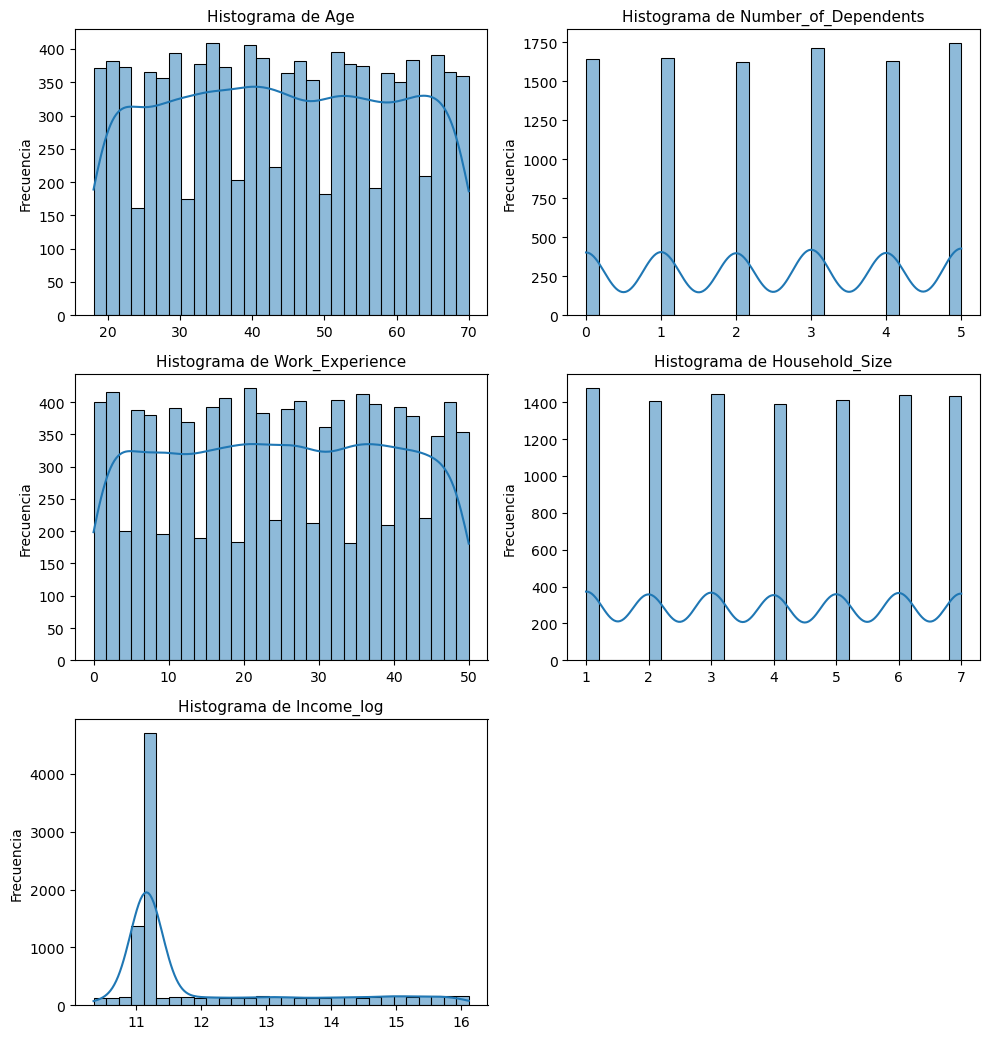


--- Comparación log antes vs después ---


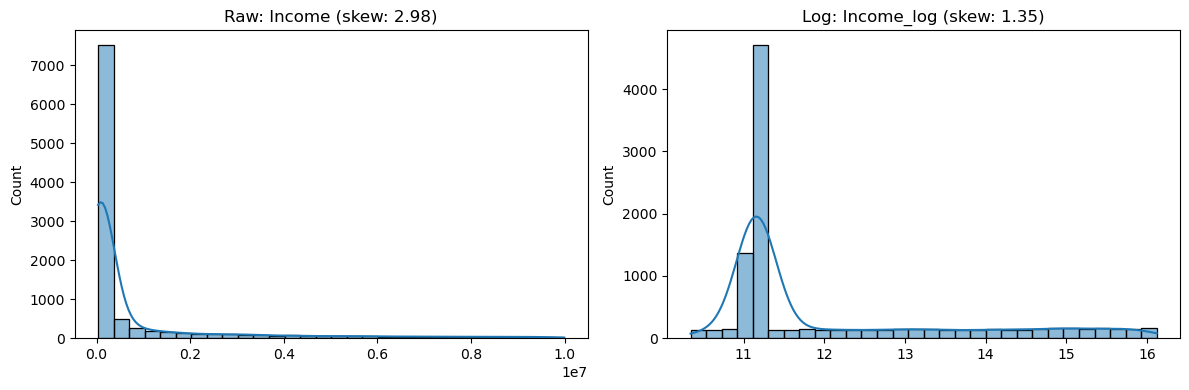


--- Boxplots ---


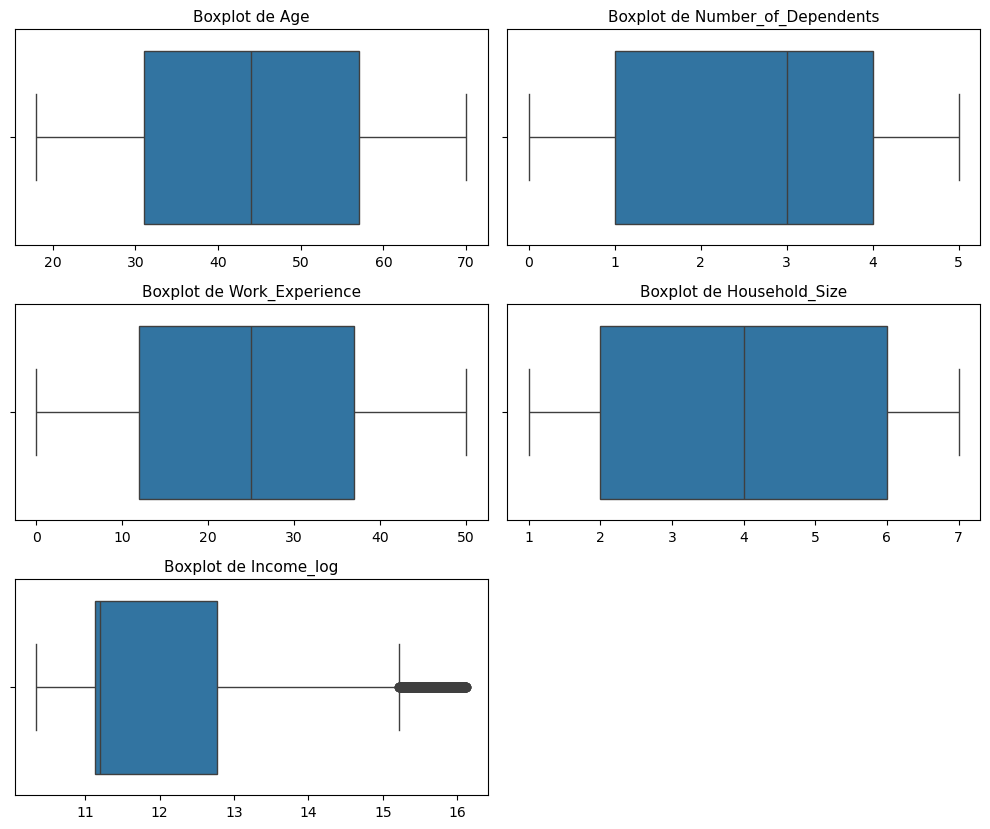


--- Barplots (variables discretas) ---


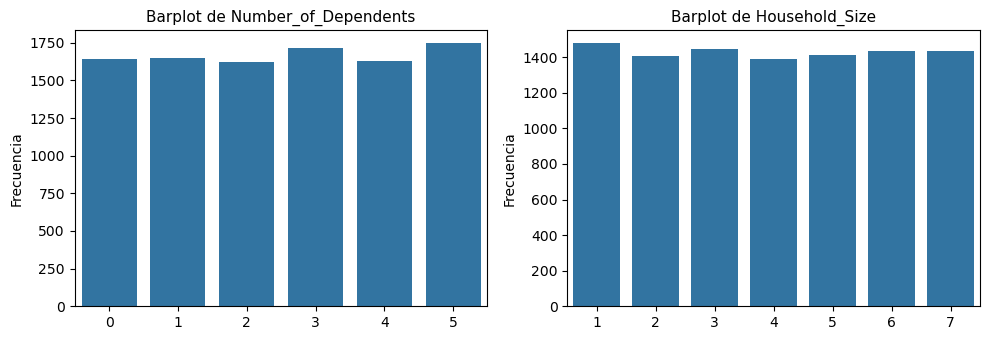

In [200]:
eda_univariado_numericas(df_raw, df_inter, num_raw, num_inter)

#### 4.2) Categóricas: frecuencias y visualización

In [201]:
def eda_univariado_categoricas(df, cat_cols=None):

    # Identificar variables categóricas
    if cat_cols is None:
        cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

    print("\nVariables categóricas analizadas:")
    print(cat_cols)

    if not cat_cols:
        print("No se identificaron variables categóricas.")
        return

    # Parámetros visuales automáticos
    n_vars = len(cat_cols)
    n_cols = 2 if n_vars <= 6 else 3
    n_rows = math.ceil(n_vars / n_cols)

    # COUNT PLOTS (Top 10)=
    print("\n--- Countplots (Top 10 categorías) ---")

    plt.figure(figsize=(6*n_cols, 3.5*n_rows))

    for i, col in enumerate(cat_cols, 1):
        plt.subplot(n_rows, n_cols, i)

        order = df[col].value_counts().head(10).index

        sns.countplot(
            y=col,
            data=df,
            order=order
        )

        plt.title(f"Top 10 categorías — {col}", fontsize=11)
        plt.xlabel("Frecuencia")
        plt.ylabel("")

    plt.tight_layout()
    plt.savefig(GRAPHS_PATH_INCOME / "countplots.png", dpi=300, bbox_inches='tight')
    plt.show()

    # TABLAS DE FRECUENCIAS (Top 10)
    print("\n--- Tablas de frecuencia (Top 10) ---")

    for col in cat_cols:
        print(f"\nVariable categórica: {col}")

        freq_table = (
            df[col]
            .value_counts(dropna=False)
            .to_frame("frecuencia")
        )

        freq_table["frecuencia_relativa"] = (
            freq_table["frecuencia"] / freq_table["frecuencia"].sum()
        ).round(3)

        display(freq_table.head(10))


Variables categóricas analizadas:
['Education_Level', 'Occupation', 'Location', 'Marital_Status', 'Employment_Status', 'Homeownership_Status', 'Type_of_Housing', 'Gender', 'Primary_Mode_of_Transportation']

--- Countplots (Top 10 categorías) ---


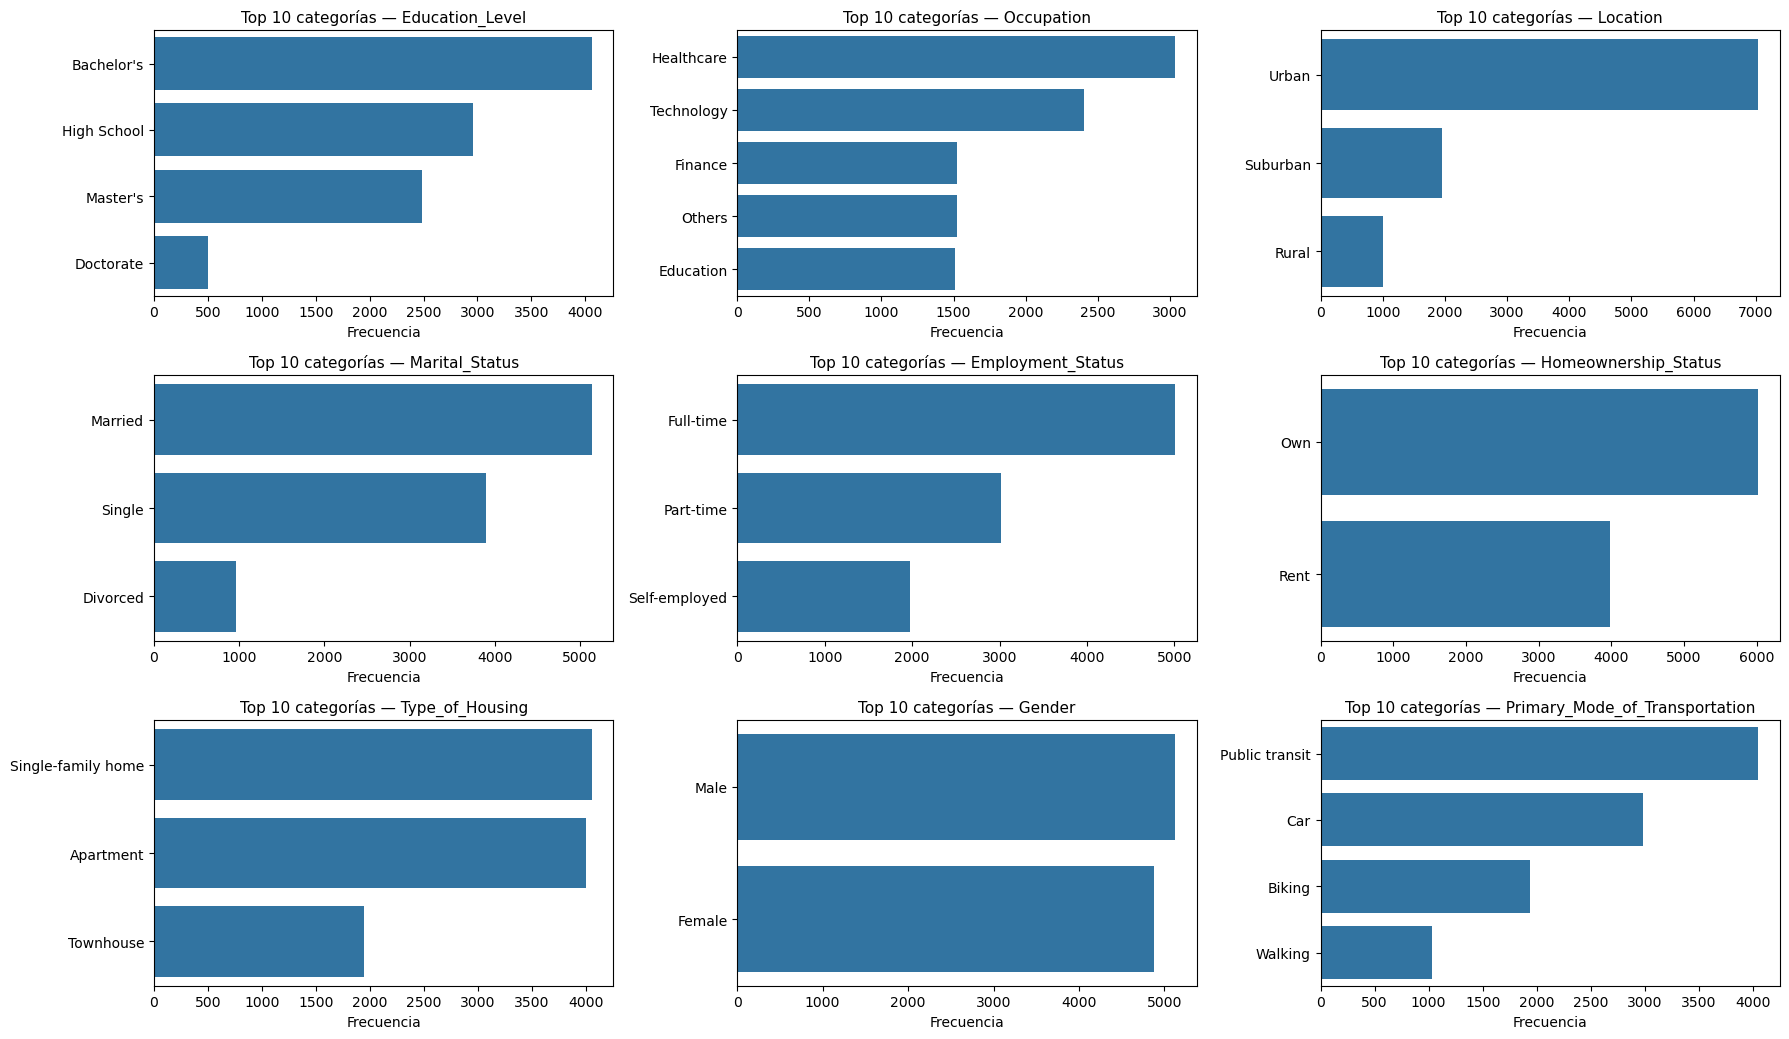


--- Tablas de frecuencia (Top 10) ---

Variable categórica: Education_Level


,frecuencia,frecuencia_relativa
Education_Level,,
Bachelor's,4058,0.406
High School,2959,0.296
Master's,2482,0.248
Doctorate,501,0.050



Variable categórica: Occupation


,frecuencia,frecuencia_relativa
Occupation,,
Healthcare,3035,0.304
Technology,2407,0.241
Finance,1525,0.152
Others,1521,0.152
Education,1512,0.151



Variable categórica: Location


,frecuencia,frecuencia_relativa
Location,,
Urban,7037,0.704
Suburban,1951,0.195
Rural,1012,0.101



Variable categórica: Marital_Status


,frecuencia,frecuencia_relativa
Marital_Status,,
Married,5136,0.514
Single,3900,0.390
Divorced,964,0.096



Variable categórica: Employment_Status


,frecuencia,frecuencia_relativa
Employment_Status,,
Full-time,5004,0.500
Part-time,3016,0.302
Self-employed,1980,0.198



Variable categórica: Homeownership_Status


,frecuencia,frecuencia_relativa
Homeownership_Status,,
Own,6018,0.602
Rent,3982,0.398



Variable categórica: Type_of_Housing


,frecuencia,frecuencia_relativa
Type_of_Housing,,
Single-family home,4055,0.406
Apartment,4001,0.400
Townhouse,1944,0.194



Variable categórica: Gender


,frecuencia,frecuencia_relativa
Gender,,
Male,5123,0.512
Female,4877,0.488



Variable categórica: Primary_Mode_of_Transportation


,frecuencia,frecuencia_relativa
Primary_Mode_of_Transportation,,
Public transit,4047,0.405
Car,2986,0.299
Biking,1940,0.194
Walking,1027,0.103


In [202]:
eda_univariado_categoricas(df_inter, cat_inter)

#### 4.3) Preprocesamiento

No hubo un pre procesamiento ex post
Income presenta outlayers; sin embargo, no se re escalará para el curso

## 5) EDA bivariado: variables explicativas vs target

### 5.1 Para Regresión

In [205]:
TARGET_LOG = "Income_log"
num_inter.remove(TARGET_LOG)

#### 5.1.1) Numéricas vs Target

In [206]:
# 1. Boxplot por buckets (detecta no linealidad, dispersión y outliers)
def boxplot_target_by_buckets(df, num_cols, target, q=5):

    # Parámetros visuales automáticos
    n_vars = len(num_cols)
    n_cols = 2 if n_vars <= 6 else 3
    n_rows = math.ceil(n_vars / n_cols)
    plt.figure(figsize=(5 * n_cols, 3.5 * n_rows))
    plot_idx = 1

    for col in num_cols:
        df_temp = df[[col, target]].dropna()

        if df_temp.empty:
            continue

        df_temp = df_temp.copy()
        df_temp['bucket'] = pd.qcut(df_temp[col], q=q, duplicates='drop')

        plt.subplot(n_rows, n_cols, plot_idx)
        sns.boxplot(
            x='bucket',
            y=target,
            data=df_temp
        )
        plt.title(col, fontsize=10)
        plt.xlabel('Buckets')
        plt.ylabel(target)
        plt.xticks(rotation=30)

        plot_idx += 1

    plt.suptitle(f'Boxplot de {target} por buckets (todas las variables)', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(
        GRAPHS_PATH_INCOME / f"boxplot_{target}_by_buckets_all_vars.png",
        dpi=300,
        bbox_inches='tight'
    )
    plt.show()


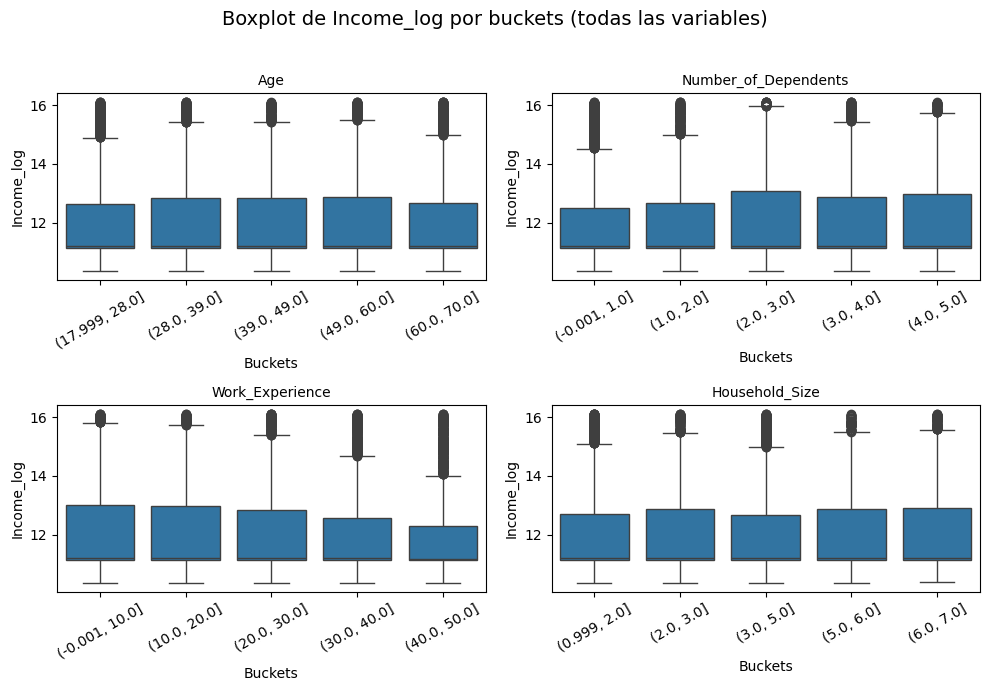

In [207]:
boxplot_target_by_buckets(df_inter, num_inter, TARGET_LOG, q=5)

In [208]:
def boxplot_target_by_buckets(df, num_cols, target, q=5):

    for col in num_cols:
        df_temp = df[[col, target]].dropna()
        if df_temp.empty:
            continue

        df_temp = df_temp.copy()
        df_temp['bucket'] = pd.qcut(df_temp[col], q=q, duplicates='drop')

        stats = (
            df_temp
            .groupby('bucket', observed=True)[target]
            .agg(['count', 'mean', 'median'])
            .round(2)
            .reset_index()
        )

        # ---- Tabla 
        print(f'\nTabla de {col} (por quintiles):')
        display(stats)
    
    plt.show()

In [209]:
boxplot_target_by_buckets(df_inter, num_inter, TARGET_LOG, q=5)


Tabla de Age (por quintiles):


,bucket,count,mean,median
0,"(17.999, 28.0]",2009,12.01,11.20
1,"(28.0, 39.0]",2126,12.10,11.20
2,"(39.0, 49.0]",1920,12.06,11.20
3,"(49.0, 60.0]",2047,12.10,11.20
4,"(60.0, 70.0]",1898,12.03,11.19



Tabla de Number_of_Dependents (por quintiles):


,bucket,count,mean,median
0,"(-0.001, 1.0]",3293,12.01,11.19
1,"(1.0, 2.0]",1621,12.04,11.20
2,"(2.0, 3.0]",1712,12.13,11.20
3,"(3.0, 4.0]",1629,12.09,11.20
4,"(4.0, 5.0]",1745,12.08,11.20



Tabla de Work_Experience (por quintiles):


,bucket,count,mean,median
0,"(-0.001, 10.0]",2179,12.12,11.21
1,"(10.0, 20.0]",1941,12.13,11.21
2,"(20.0, 30.0]",2002,12.09,11.20
3,"(30.0, 40.0]",1987,12.00,11.19
4,"(40.0, 50.0]",1891,11.95,11.19



Tabla de Household_Size (por quintiles):


,bucket,count,mean,median
0,"(0.999, 2.0]",2883,12.06,11.20
1,"(2.0, 3.0]",1445,12.08,11.20
2,"(3.0, 5.0]",2802,12.04,11.20
3,"(5.0, 6.0]",1437,12.03,11.19
4,"(6.0, 7.0]",1433,12.10,11.20


In [210]:
def tendencia_buckets(df, num_cols, target, q=5, stat="mean"):

    num_cols = [c for c in num_cols if not c.endswith("_log")]
    agg_func = {"mean": "mean", "median": "median"}[stat]

    n = len(num_cols)
    n_cols = 2 if n <= 6 else 3
    n_rows = math.ceil(n / n_cols)

    plt.figure(figsize=(5 * n_cols, 3.5 * n_rows))
    plot_idx = 1

    print(f"\n--- Tendencia por buckets usando {stat} ---")

    for col in num_cols:
        df_temp = df[[col, target]].dropna()
        if df_temp.empty or df_temp[col].nunique() < 2:
            continue

        df_temp["bucket"] = pd.qcut(
            df_temp[col],
            q=min(q, df_temp[col].nunique()),
            duplicates="drop"
        )

        stats = (
            df_temp
            .groupby("bucket", observed=True)[target]
            .agg(["mean", "median"])
            .round(2)
        )

        # ---- gráfico
        plt.subplot(n_rows, n_cols, plot_idx)
        plt.plot(stats.index.astype(str), stats[agg_func], marker="o")
        plt.title(col, fontsize=10)
        plt.xticks(rotation=30)
        plt.ylabel(target)
        plot_idx += 1

        # ---- tendencia numérica
        vals = stats[agg_func].values
        diffs = np.diff(vals)

        if np.all(diffs >= 0):
            trend = "Creciente"
        elif np.all(diffs <= 0):
            trend = "Decreciente"
        else:
            trend = "No monótona"

        print(f"{col}: {trend} | {stat}s: {np.round(vals,2)}")

    plt.suptitle(f"Tendencia de {target} por buckets ({stat})", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(
        GRAPHS_PATH_INCOME / f"trend_{target}_by_buckets_{stat}.png",
        dpi=300,
        bbox_inches="tight"
    )
    plt.show()


--- Tendencia por buckets usando median ---
Age: Decreciente | medians: [11.2  11.2  11.2  11.2  11.19]
Number_of_Dependents: Creciente | medians: [11.19 11.2  11.2  11.2  11.2 ]
Work_Experience: Decreciente | medians: [11.21 11.21 11.2  11.19 11.19]
Household_Size: No monótona | medians: [11.2  11.2  11.2  11.19 11.2 ]


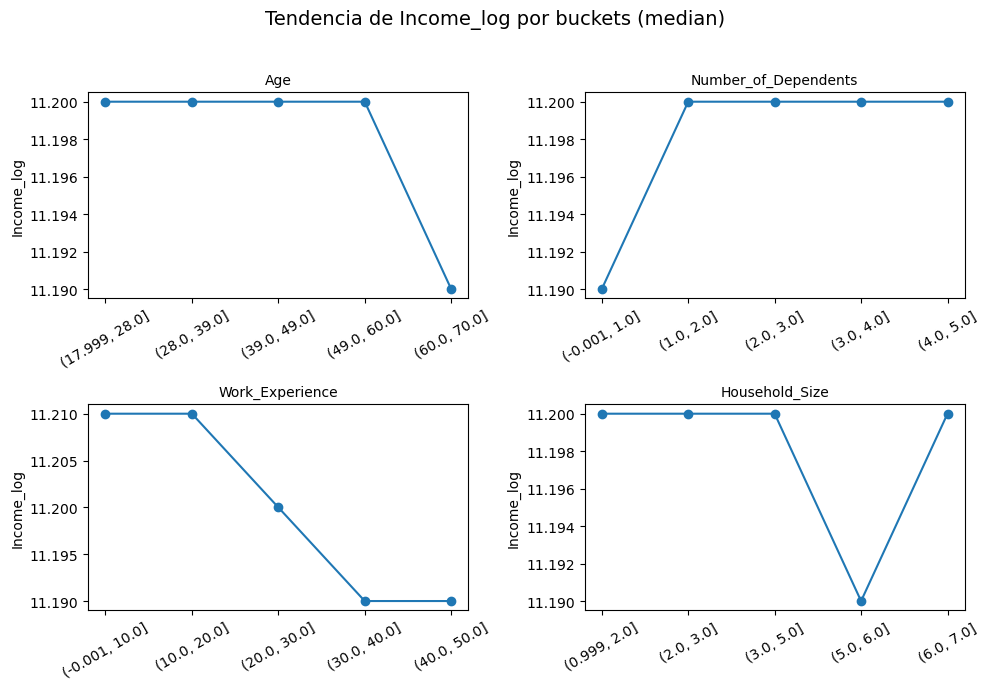

In [211]:
tendencia_buckets(df_inter, num_inter, TARGET_LOG, stat="median")


--- Tendencia por buckets usando median ---
Age: Decreciente | medians: [11.2  11.2  11.2  11.2  11.19]
Number_of_Dependents: Creciente | medians: [11.19 11.2  11.2  11.2  11.2 ]
Work_Experience: Decreciente | medians: [11.21 11.21 11.2  11.19 11.19]
Household_Size: No monótona | medians: [11.2  11.2  11.2  11.19 11.2 ]


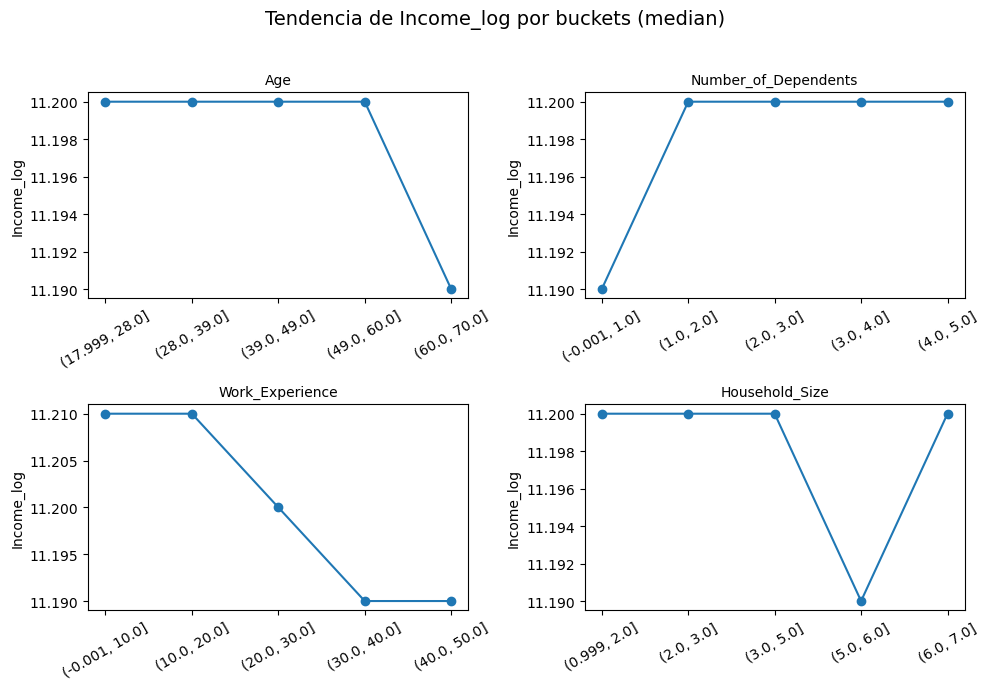

In [212]:
tendencia_buckets(df_inter, num_inter, TARGET_LOG, stat="median")

In [213]:
# Scater plots de variables numéricas vs target
def scatter_numericas_vs_target(df, num_cols, target):
    n_vars = len(num_cols)
    n_cols = 2 if n_vars <= 6 else 3
    n_rows = math.ceil(n_vars / n_cols)

    plt.figure(figsize=(5*n_cols, 3.5*n_rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.scatterplot(x=df[col], y=df[target])
        plt.title(f"{col} vs {target}", fontsize=11)
        plt.xlabel(col)
        plt.ylabel(target)

    plt.tight_layout()
    plt.savefig(GRAPHS_PATH_INCOME / f"scatter_{target}_vs_numericas.png", dpi=300, bbox_inches='tight')
    plt.show()

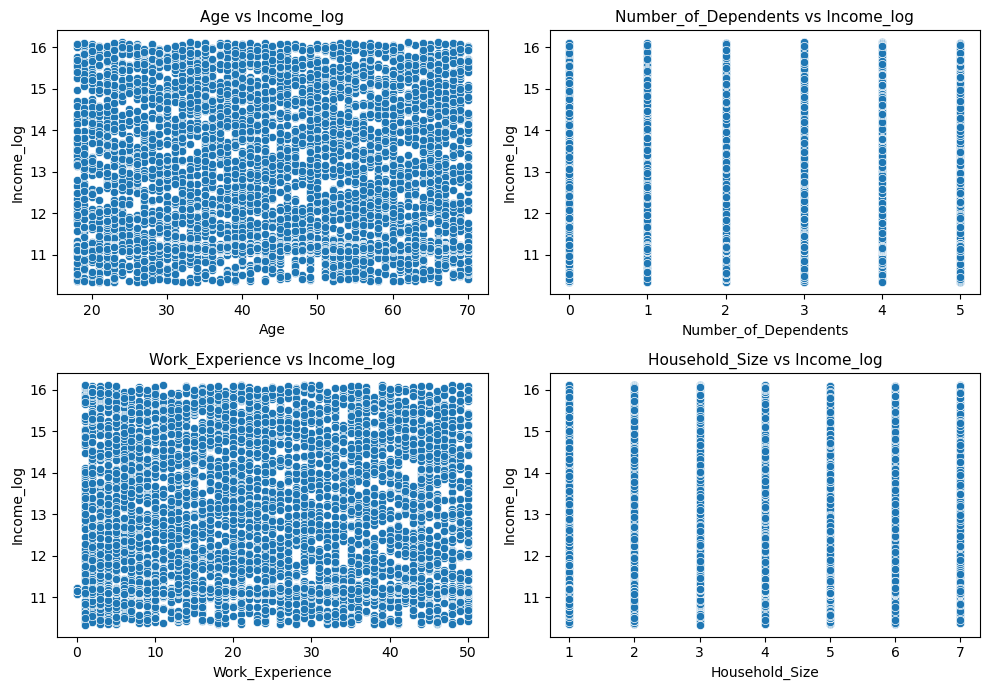

In [214]:
scatter_numericas_vs_target(df_inter, num_inter, TARGET_LOG)

#### 5.1.2) Categóricas vs Target

In [215]:
def target_medio_por_categoria(df, cat_cols, target):

    stats_dict = {}

    # ======= calcular stats  =======
    for col in cat_cols:
        df_temp = df[[col, target]].dropna()
        if df_temp.empty:
            continue

        stats = (
            df_temp
            .groupby(col)[target]
            .agg(["mean", "median"])
            .round(4)
            .sort_values("mean", ascending=False)
        )

        stats_dict[col] = stats

        print(f"\n{'='*50}")
        print(f"Target por categoría: {col}")
        print(f"{'='*50}")
        display(stats)

    # ======= función interna de plotting =======
    def plot_stat(stat_name, file_suffix):

        n_vars = len(stats_dict)
        n_cols = 2 if n_vars <= 4 else 3
        n_rows = math.ceil(n_vars / n_cols)

        plt.figure(figsize=(5 * n_cols, 3.8 * n_rows))
        plot_idx = 1

        for col, stats in stats_dict.items():
            top_cats = stats.head(15)

            plt.subplot(n_rows, n_cols, plot_idx)
            plt.bar(top_cats.index.astype(str), top_cats[stat_name])

            plt.title(col, fontsize=10)
            plt.xlabel(col)
            plt.ylabel(target)
            plt.xticks(rotation=45, ha="right", fontsize=8)

            plot_idx += 1

        plt.suptitle(
            f"{stat_name.capitalize()} de {target} por categoría (Top 15)",
            fontsize=14
        )
        plt.tight_layout(rect=[0, 0, 1, 0.96])

        plt.savefig(
            GRAPHS_PATH_INCOME / f"{target}_{file_suffix}_por_categorias.png",
            dpi=300,
            bbox_inches="tight"
        )
        plt.show()

    # ======= gráficos =======
    plot_stat("mean", "mean")
    plot_stat("median", "median")


Se elige analizar con la target sin log para ver diferencias marcadas en la escala original


Target por categoría: Education_Level


,mean,median
Education_Level,,
High School,868667.4015,73452.0
Bachelor's,812335.9108,72888.0
Master's,800383.4259,72747.0
Doctorate,628710.6527,71346.0



Target por categoría: Occupation


,mean,median
Occupation,,
Education,920816.7526,73317.0
Technology,836173.7860,72650.0
Others,828970.3925,73428.0
Healthcare,799238.7631,73146.0
Finance,706152.6695,72228.0



Target por categoría: Location


,mean,median
Location,,
Rural,1.050473e+06,74815.0
Suburban,9.213989e+05,73198.0
Urban,7.542496e+05,72664.0



Target por categoría: Marital_Status


,mean,median
Marital_Status,,
Married,839259.7282,72919.0
Single,796211.0313,72936.0
Divorced,780830.5820,73112.0



Target por categoría: Employment_Status


,mean,median
Employment_Status,,
Part-time,905303.1940,73512.0
Full-time,780894.9594,72812.0
Self-employed,772923.6652,72616.0



Target por categoría: Homeownership_Status


,mean,median
Homeownership_Status,,
Rent,956890.0630,75328.0
Own,724168.4008,71921.0



Target por categoría: Type_of_Housing


,mean,median
Type_of_Housing,,
Apartment,873187.8253,73556.0
Single-family home,793627.0469,72658.0
Townhouse,749279.5797,72575.0



Target por categoría: Gender


,mean,median
Gender,,
Female,820978.3314,72800.0
Male,812896.8075,73100.0



Target por categoría: Primary_Mode_of_Transportation


,mean,median
Primary_Mode_of_Transportation,,
Biking,848860.2407,73242.0
Walking,829271.0730,72956.0
Public transit,823184.6298,72834.0
Car,783155.7974,72937.0


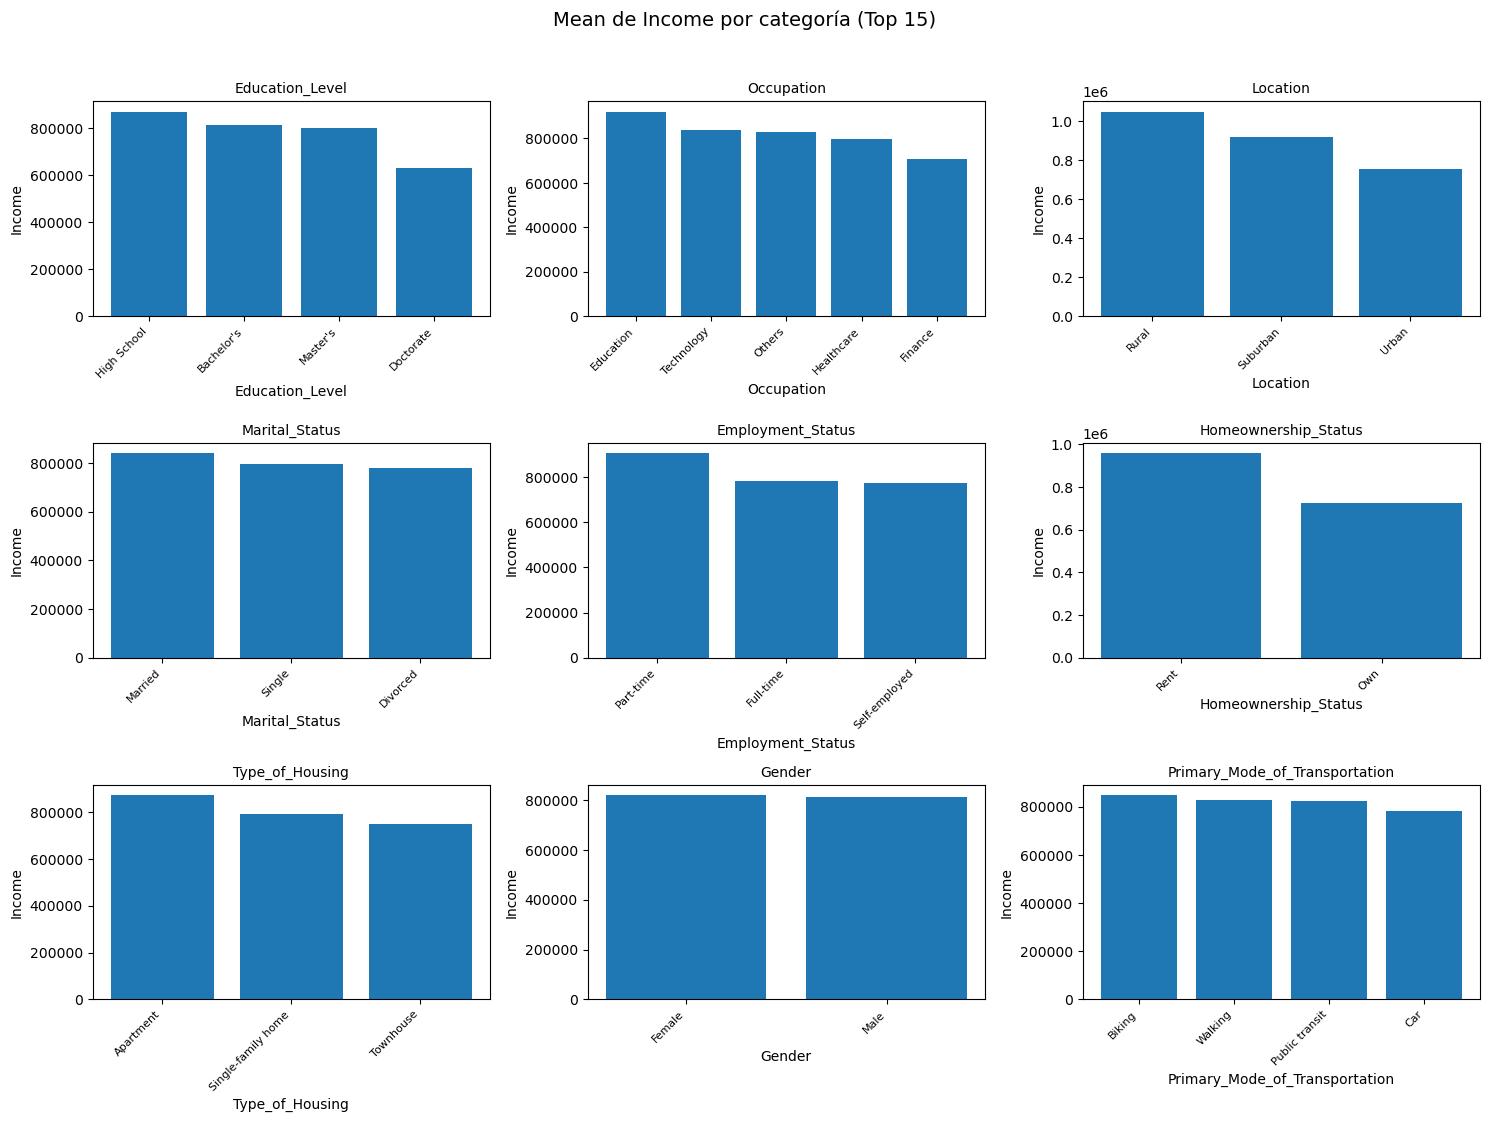

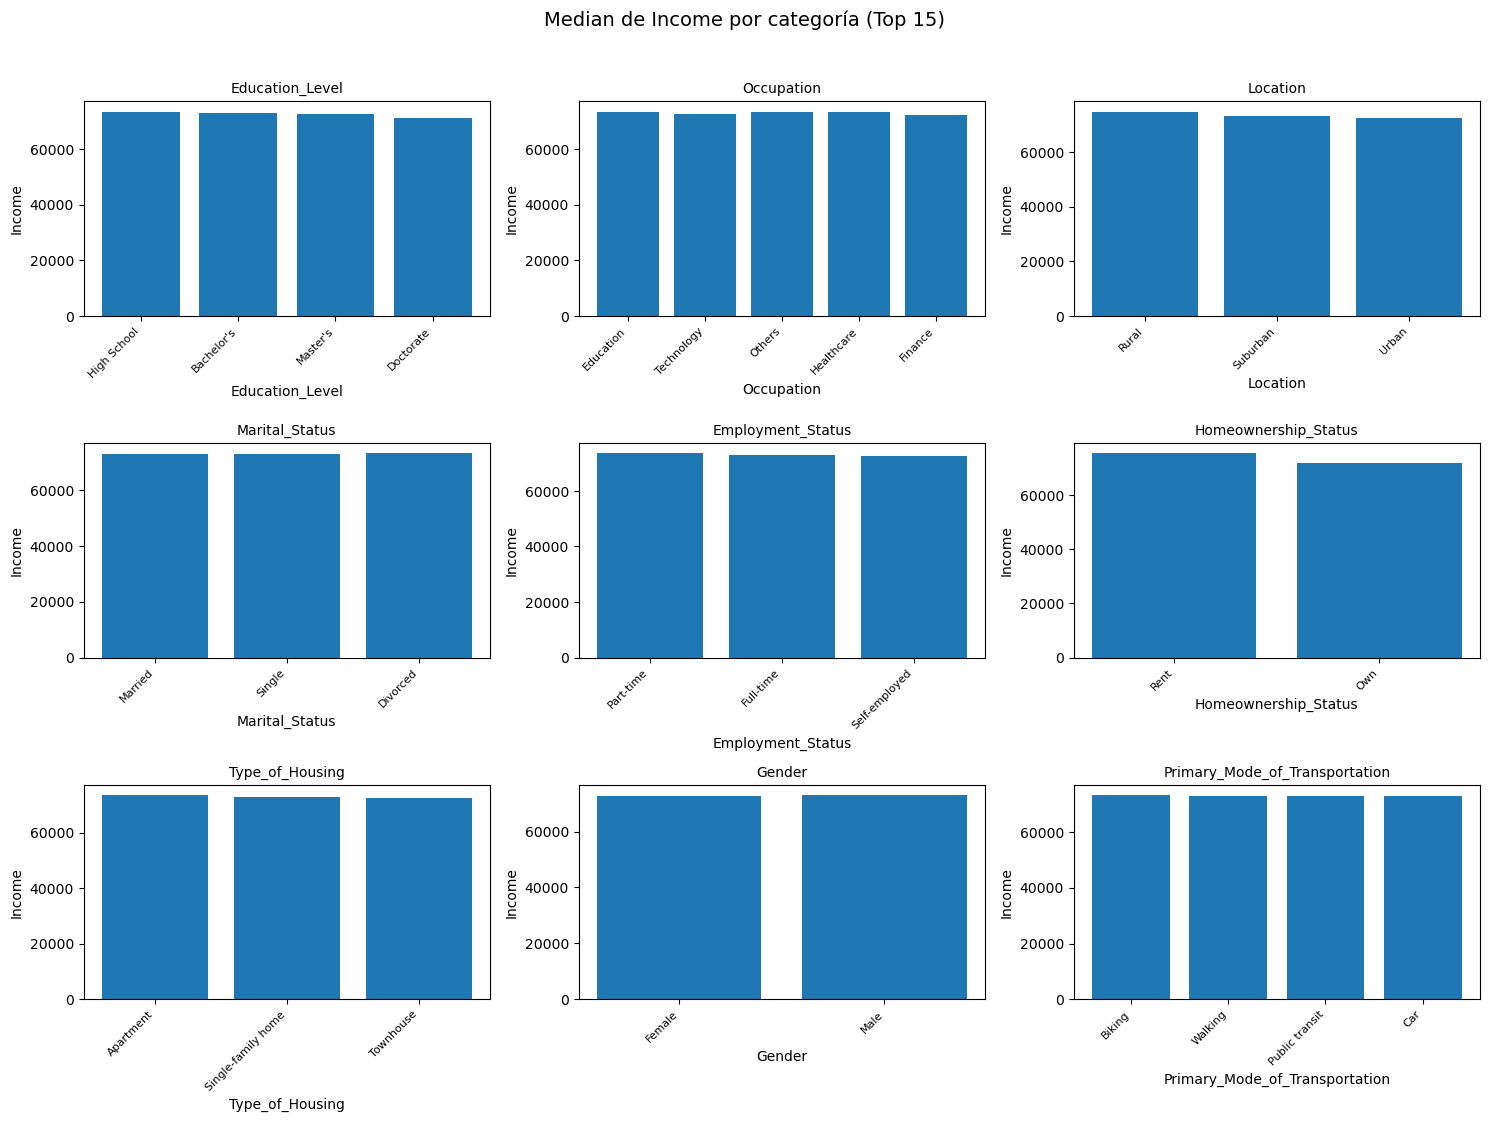

In [216]:
target_medio_por_categoria(df_raw, cat_raw, TARGET_REG)

In [217]:
# 2. Registros por categoría (evitar conclusiones con n pequeño)
def registros_por_categoria(df, cat_cols, target, threshold=1):
    """
    Detecta categorías raras.
    """
    for col in cat_cols:
        df_temp = df[[col, target]].dropna()
        if df_temp.empty:
            print(f"Sin datos para {col}")
            continue
        
        conteo = df_temp.groupby(col).size().reset_index(name='n')
        conteo['pct_total'] = (conteo['n'] / conteo['n'].sum() * 100).round(2)
        conteo = conteo.sort_values('n', ascending=False)
        
        print(f"\n{'='*50}")
        print(f"Registros por categoría: {col}")
        print(f"{'='*50}")
        display(conteo)
        
        # Identificar categorías raras (< threshold %)
        raras = conteo[conteo['pct_total'] < threshold]
        if not raras.empty:
            print(f"\n⚠️ Categorías raras (<{threshold}%): {len(raras)} de {len(conteo)}")
            display(raras)
        else :
            print(f"No se identificaron categorías raras. (< {threshold}%) ")

In [218]:
registros_por_categoria(df_inter, cat_inter, TARGET_LOG)


Registros por categoría: Education_Level


,Education_Level,n,pct_total
0,Bachelor's,4058,40.58
2,High School,2959,29.59
3,Master's,2482,24.82
1,Doctorate,501,5.01


No se identificaron categorías raras. (< 1%) 

Registros por categoría: Occupation


,Occupation,n,pct_total
2,Healthcare,3035,30.35
4,Technology,2407,24.07
1,Finance,1525,15.25
3,Others,1521,15.21
0,Education,1512,15.12


No se identificaron categorías raras. (< 1%) 

Registros por categoría: Location


,Location,n,pct_total
2,Urban,7037,70.37
1,Suburban,1951,19.51
0,Rural,1012,10.12


No se identificaron categorías raras. (< 1%) 

Registros por categoría: Marital_Status


,Marital_Status,n,pct_total
1,Married,5136,51.36
2,Single,3900,39.00
0,Divorced,964,9.64


No se identificaron categorías raras. (< 1%) 

Registros por categoría: Employment_Status


,Employment_Status,n,pct_total
0,Full-time,5004,50.04
1,Part-time,3016,30.16
2,Self-employed,1980,19.80


No se identificaron categorías raras. (< 1%) 

Registros por categoría: Homeownership_Status


,Homeownership_Status,n,pct_total
0,Own,6018,60.18
1,Rent,3982,39.82


No se identificaron categorías raras. (< 1%) 

Registros por categoría: Type_of_Housing


,Type_of_Housing,n,pct_total
1,Single-family home,4055,40.55
0,Apartment,4001,40.01
2,Townhouse,1944,19.44


No se identificaron categorías raras. (< 1%) 

Registros por categoría: Gender


,Gender,n,pct_total
1,Male,5123,51.23
0,Female,4877,48.77


No se identificaron categorías raras. (< 1%) 

Registros por categoría: Primary_Mode_of_Transportation


,Primary_Mode_of_Transportation,n,pct_total
2,Public transit,4047,40.47
1,Car,2986,29.86
0,Biking,1940,19.40
3,Walking,1027,10.27


No se identificaron categorías raras. (< 1%) 


In [219]:
def dispersion_por_categoria(df, cat_cols, target, top_k=10):
    """
    Calcula dispersión (std, P25, P75, IQR) del target por categoría.
    """
    # Parámetros visuales automáticos
    n_vars = len(cat_cols)
    n_cols = 2 if n_vars <= 4 else 3
    n_rows = math.ceil(n_vars / n_cols)

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    plot_idx = 1

    for col in cat_cols:
        df_temp = df[[col, target]].dropna()
        if df_temp.empty:
            continue

        # ---- Estadísticos de dispersión
        stats = df_temp.groupby(col)[target].agg(
            n='count',
            mean='mean',
            std='std',
            P25=lambda x: x.quantile(0.25),
            P75=lambda x: x.quantile(0.75)
        ).round(4)

        stats['IQR'] = round(stats['P75'] - stats['P25'], 4)
        stats = stats.sort_values('mean', ascending=False)

        print(f"\n{'='*50}")
        print(f"Dispersión del target por categoría: {col}")
        print(f"{'='*50}")
        display(stats)

        # ---- Top-K categorías por frecuencia
        top_cats = df_temp[col].value_counts().head(top_k).index.tolist()
        df_top = df_temp[df_temp[col].isin(top_cats)]

        if df_top.empty:
            continue

        order = (
            df_top
            .groupby(col)[target]
            .mean()
            .round(4)
            .sort_values(ascending=False)
            .index
        )

        # ---- Subplot
        plt.subplot(n_rows, n_cols, plot_idx)
        sns.boxplot(
            data=df_top,
            x=col,
            y=target,
            order=order
        )

        plt.title(col, fontsize=10)
        plt.xlabel(col)
        plt.ylabel(target)
        plt.xticks(rotation=45, ha='right', fontsize=8)

        plot_idx += 1

    plt.suptitle(
        f'Dispersión del {target} por categoría (Top {top_k})',
        fontsize=14
    )
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    plt.savefig(
        GRAPHS_PATH_INCOME / f"dispersion_{target}_por_categorias_all_vars.png",
        dpi=300,
        bbox_inches='tight'
    )
    plt.show()



Dispersión del target por categoría: Education_Level


,n,mean,std,P25,P75,IQR
Education_Level,,,,,,
High School,2959,12.1223,1.5573,11.1372,13.0052,1.8680
Bachelor's,4058,12.0623,1.5173,11.1328,12.8157,1.6829
Master's,2482,12.0373,1.5088,11.1330,12.6605,1.5275
Doctorate,501,11.7898,1.3803,11.1205,11.2305,0.1100



Dispersión del target por categoría: Occupation


,n,mean,std,P25,P75,IQR
Occupation,,,,,,
Education,1512,12.1696,1.5809,11.1378,13.2236,2.0858
Others,1521,12.0963,1.5371,11.1332,12.9308,1.7976
Healthcare,3035,12.0670,1.5039,11.1369,12.8275,1.6906
Technology,2407,12.0357,1.5345,11.1304,12.5775,1.4471
Finance,1525,11.9408,1.4548,11.1291,12.1314,1.0023



Dispersión del target por categoría: Location


,n,mean,std,P25,P75,IQR
Location,,,,,,
Rural,1012,12.3562,1.6440,11.1402,13.6381,2.4979
Suburban,1951,12.1473,1.5849,11.1365,13.1078,1.9713
Urban,7037,11.9935,1.4793,11.1321,12.5100,1.3779



Dispersión del target por categoría: Marital_Status


,n,mean,std,P25,P75,IQR
Marital_Status,,,,,,
Married,5136,12.0755,1.5359,11.1340,12.7592,1.6252
Divorced,964,12.0491,1.5107,11.1348,12.8125,1.6777
Single,3900,12.0427,1.5066,11.1332,12.7529,1.6197



Dispersión del target por categoría: Employment_Status


,n,mean,std,P25,P75,IQR
Employment_Status,,,,,,
Part-time,3016,12.1460,1.5733,11.1384,13.0205,1.8821
Full-time,5004,12.0405,1.5003,11.1319,12.7430,1.6111
Self-employed,1980,11.9794,1.4915,11.1313,12.3938,1.2625



Dispersión del target por categoría: Homeownership_Status


,n,mean,std,P25,P75,IQR
Homeownership_Status,,,,,,
Rent,3982,12.3287,1.5868,11.1457,13.4978,2.3521
Own,6018,11.8825,1.4507,11.1278,11.6209,0.4931



Dispersión del target por categoría: Type_of_Housing


,n,mean,std,P25,P75,IQR
Type_of_Housing,,,,,,
Apartment,4001,12.1374,1.5542,11.1370,13.0102,1.8732
Single-family home,4055,12.0308,1.5123,11.1301,12.6655,1.5354
Townhouse,1944,11.9626,1.4674,11.1339,12.2722,1.1383



Dispersión del target por categoría: Gender


,n,mean,std,P25,P75,IQR
Gender,,,,,,
Male,5123,12.0675,1.5183,11.1353,12.8304,1.6951
Female,4877,12.0525,1.5261,11.1321,12.7116,1.5795



Dispersión del target por categoría: Primary_Mode_of_Transportation


,n,mean,std,P25,P75,IQR
Primary_Mode_of_Transportation,,,,,,
Biking,1940,12.0885,1.5369,11.1344,12.8278,1.6934
Walking,1027,12.0816,1.5351,11.1294,12.8873,1.7579
Public transit,4047,12.0583,1.5255,11.1348,12.7534,1.6186
Car,2986,12.0370,1.5034,11.1338,12.7109,1.5771


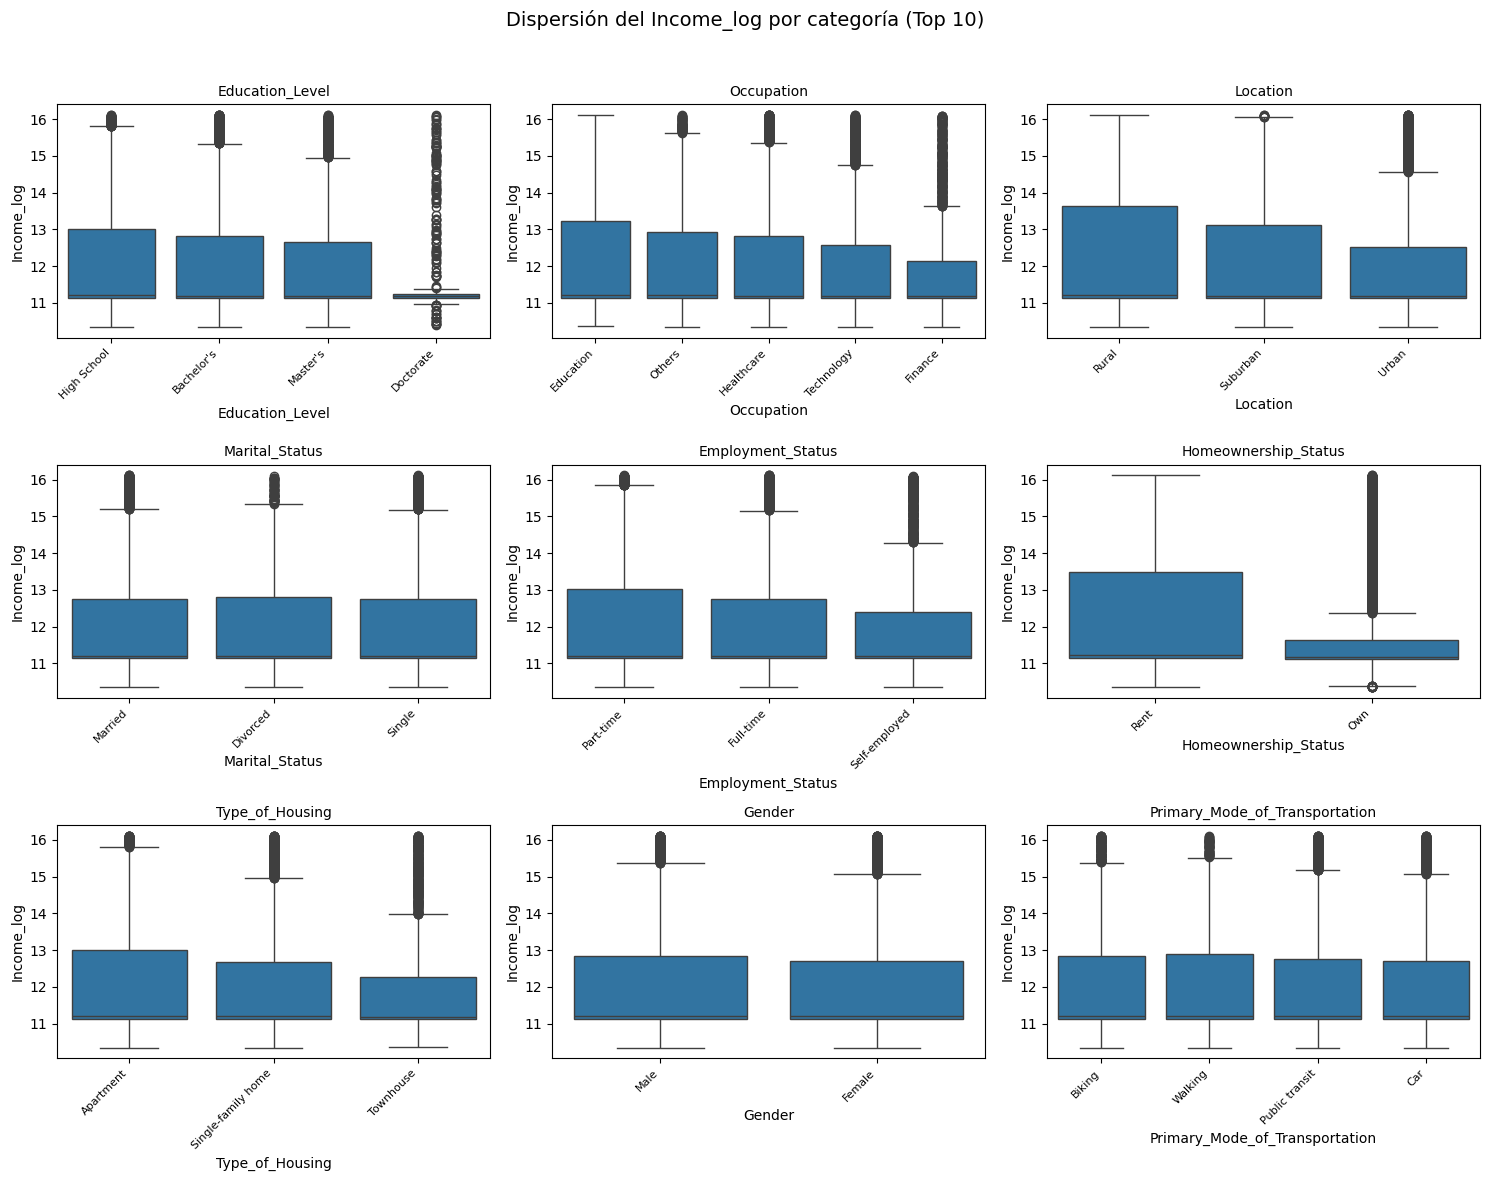

In [220]:
dispersion_por_categoria(df_inter, cat_inter, TARGET_LOG, top_k=10)